# Project 2

### Import Dependencies

In [151]:
!pip install pprint
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import requests
from pprint import pprint
import numpy as np
import json
import pymongo
from pymongo import MongoClient


# Extract JSON data into a DataFrame

In [54]:
# pd.read_json(json_file).head()
import json
import pprint
import requests
import urllib
import numpy as np

x = "file:///C:/Users/Liana/Desktop/Data%20Science_LAM/Project%202/socrata_metadata.json"


In [55]:
connection = urllib.request.urlopen(x)

js = connection.read()
info = json.loads(js.decode("utf-8"))
js


b'{"provenance": "official", "viewLastModified": 1564783402, "hideFromDataJson": false, "rowsUpdatedBy": "xzik-pf59", "publicationStage": "published", "displayType": "table", "columns": [{"position": 1, "id": 421205602, "cachedContents": {"not_null": "2075", "cardinality": "2074", "top": [{"count": "2", "item": "350641"}, {"count": "1", "item": "893308"}, {"count": "1", "item": "606710"}, {"count": "1", "item": "304365"}, {"count": "1", "item": "909589"}, {"count": "1", "item": "051654"}, {"count": "1", "item": "581383"}, {"count": "1", "item": "780672"}, {"count": "1", "item": "881126"}, {"count": "1", "item": "881383"}, {"count": "1", "item": "581316"}, {"count": "1", "item": "6V2016"}, {"count": "1", "item": "X11019"}, {"count": "1", "item": "0T2040"}, {"count": "1", "item": "780668"}, {"count": "1", "item": "0T1591"}, {"count": "1", "item": "1SIP19"}, {"count": "1", "item": "780704"}, {"count": "1", "item": "005903"}, {"count": "1", "item": "9TCR21"}], "null": "0", "largest": "XM25

## LOAD DATA IN MONGODB

### 1. Connect to MongoDB

In [287]:
client = MongoClient('mongodb://localhost:27017/')

In [288]:
# Drop Database if exists
dblist = client.list_database_names()
if "TransDB" in dblist:
    print("The database exists.") 
    client.drop_database('TransDB')
else:
    print("Database Does not exist")

Database Does not exist


In [289]:
# Create 'TransDB' database in Mongo
db = client["TransDB"]
print(client.list_database_names())

['GoldDB', 'admin', 'config', 'local', 'test']


### 3. Create Collections

In [290]:
list_collection = ["NYSRegions"]
for item in list_collection:
    collection = db[item]
    if item in db.list_collection_names():
        print(F"{item} collections exists. Dropping and recreating the collection")
        collection.drop()
        db[item]
    else:
        print(F"{item} does not exist. Creating the collection")
        db[item]

NYSRegions does not exist. Creating the collection


### 4. Load Documents in newly created collections

In [291]:
# Prepare Data to Load the "Transportation_Data" 
collection = db["Transportation"]
Transportation_Data = json.loads(dff.to_json(orient='records'))


# Insert Documents in "Transportation_Data" collection
x = collection.insert_many(Transportation_Data)
pprint(x)

### 5. Preview the List of Collections in TransDB

In [292]:
print(db.list_collection_names())

['Transportation']


### 6. Preview Documents in Collections

In [293]:
Transportation_Data = db.Transportation_Data.find()

# Iterate through each student in the collection
for row in Transportation_Data:
    pprint(row)

In [ ]:
##Create Dataframe from CSV

In [200]:
NYS_trans_csv_path = 'NYS Construction Data.csv'
# Import the data into a Pandas DataFrame
trans_df = pd.read_csv(NYS_trans_csv_path)
trans_df.head()

,Region,Status,Construction Amount,Federal Funding,State Funding,Local Funding,Current Award Amount,Estimated or Actual Completed Date,Schedule Performance,Cost Performance
0,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,No,1114305.42,2019-10-02T00:00:00.000,GREEN,GREEN
1,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,No,6922952.57,2018-11-01T00:00:00.000,GREEN,YELLOW
2,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,No,5167035.87,2019-01-09T00:00:00.000,GREEN,GREEN
3,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,No,4634531.00,2020-10-02T00:00:00.000,GREEN,GREEN
4,01 CAPITAL DISTRICT,Under Construction,NaN,No,Yes,No,1920965.00,2019-05-31T00:00:00.000,GREEN,GREEN


In [201]:
trans_df.columns

Index(['Region', 'Status', 'Construction Amount', 'Federal Funding',
       'State Funding', 'Local Funding', 'Current Award Amount',
       'Estimated or Actual Completed Date', 'Schedule Performance',
       'Cost Performance'],
      dtype='object')

In [202]:
dff = pd.DataFrame({
    "Region":trans_df["Region"],
    "Status":trans_df["Status"],
    "Federal Funding":trans_df["Federal Funding"],
    "State Funding":trans_df["State Funding"],
    "Local Funding":trans_df["Local Funding"],
})
dff.head()

,Region,Status,Federal Funding,State Funding,Local Funding
0,01 CAPITAL DISTRICT,Under Construction,Yes,Yes,No
1,01 CAPITAL DISTRICT,Under Construction,Yes,Yes,No
2,01 CAPITAL DISTRICT,Under Construction,Yes,Yes,No
3,01 CAPITAL DISTRICT,Under Construction,Yes,Yes,No
4,01 CAPITAL DISTRICT,Under Construction,No,Yes,No


# DATA ANALYSIS

### Analyze Region by Status

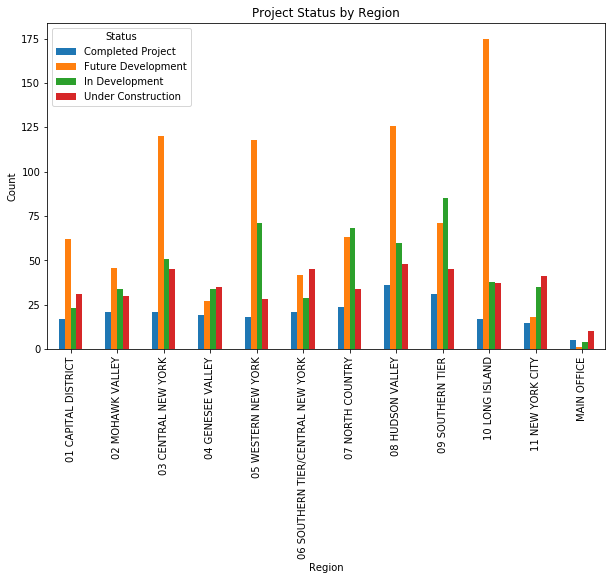

In [164]:


test5 = dff.groupby(['Region', 'Status'])['Region'].count().unstack('Status').fillna(0)

test5.plot(kind='bar', figsize= (10,6), stacked=False)
plt.ylabel('Count')
plt.title('Project Status by Region')

plt.savefig('Region by Project Status.png', bbox_inches="tight")

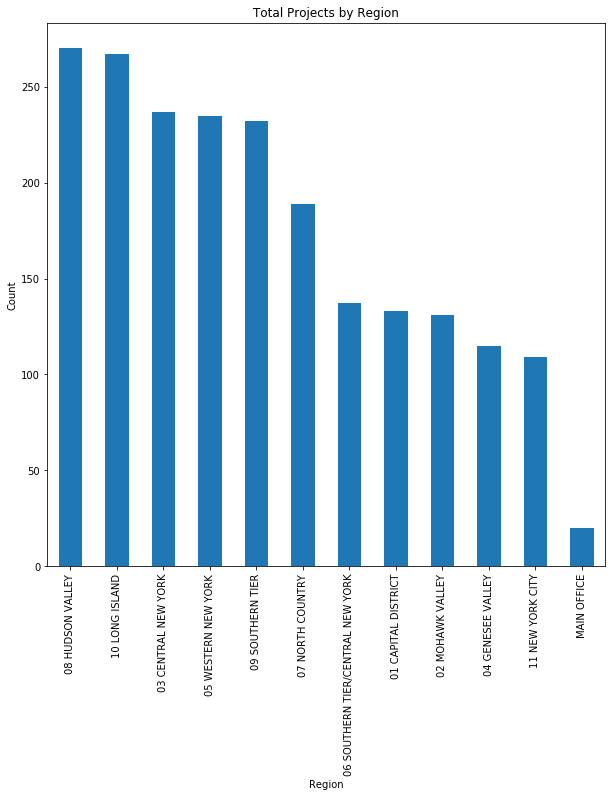

In [218]:
plt.figure(figsize = (10,10))
dff.groupby(dff['Region']).size().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Total Projects by Region')
plt.savefig('Total Projects by Region.png', bbox_inches="tight")

In [239]:
NYS_trans_csv_path = 'NYS Construction Data 1.csv'
# Import the data into a Pandas DataFrame
df = pd.read_csv(NYS_trans_csv_path)
df.head()

,Region,Status,Construction Amount,Federal Funding,State Funding,Local Funding,Current Award Amount,Estimated or Actual Completed Date,Schedule Performance,Cost Performance
0,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,NaN,1114305.42,2019-10-02T00:00:00.000,GREEN,GREEN
1,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,NaN,6922952.57,2018-11-01T00:00:00.000,GREEN,YELLOW
2,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,NaN,5167035.87,2019-01-09T00:00:00.000,GREEN,GREEN
3,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,NaN,4634531.00,2020-10-02T00:00:00.000,GREEN,GREEN
4,01 CAPITAL DISTRICT,Under Construction,NaN,NaN,Yes,NaN,1920965.00,2019-05-31T00:00:00.000,GREEN,GREEN


In [251]:
n_dff = pd.DataFrame({
    "Region":df["Region"],
    "Federal Funding":df["Federal Funding"],
    "State Funding":df["State Funding"],
    "Local Funding":df["Local Funding"],
})
n_dff.head()

,Region,Federal Funding,State Funding,Local Funding
0,01 CAPITAL DISTRICT,Yes,Yes,NaN
1,01 CAPITAL DISTRICT,Yes,Yes,NaN
2,01 CAPITAL DISTRICT,Yes,Yes,NaN
3,01 CAPITAL DISTRICT,Yes,Yes,NaN
4,01 CAPITAL DISTRICT,NaN,Yes,NaN


Text(0.5, 0.94, 'Funding Source by Region')

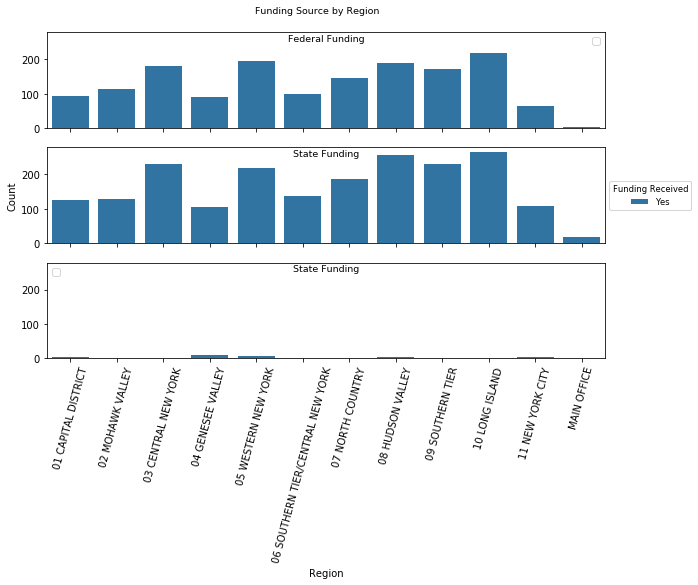

In [205]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[10,6], sharex=True, sharey=True)
g1 = sns.countplot(x='Region', hue='Federal Funding', data=df, ax=ax1)
g2 = sns.countplot(x='Region', hue='State Funding', data=df, ax=ax2)
g3 = sns.countplot(x='Region', hue='Local Funding', data=df, ax=ax3)

g1.set_title('Federal Funding', fontsize=9.5, y=.85)
g2.set_title('State Funding', fontsize=9.5, y=.85)
g3.set_title('State Funding', fontsize=9.5, y=.85)

g1.set_xlabel(''); g2.set_xlabel(''); g3.set_xlabel('Region')
g1.set_ylabel(''); g2.set_ylabel('Count'); g3.set_ylabel('')
plt.xticks(rotation=75)


g1.legend(''); g3.legend('')
leg = g2.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
leg.set_title('Funding Received', prop={'size':'small'})
fig.suptitle('Funding Source by Region', fontsize=9.5, y=.94)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

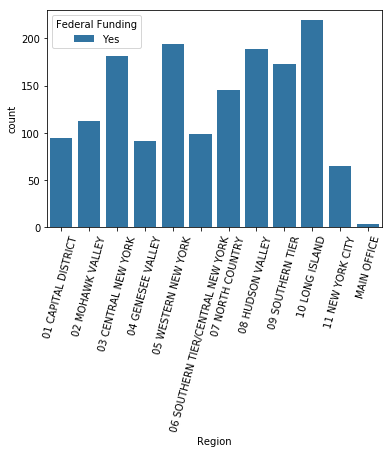

In [213]:
import seaborn as sns

sns.countplot(x='Region', hue='Federal Funding', data=df)
plt.xticks(rotation=75)

In [253]:
dff.replace({'No': 0, 'Yes': 1})

,Region,Status,Federal Funding,State Funding,Local Funding
0,01 CAPITAL DISTRICT,Under Construction,1,1,0
1,01 CAPITAL DISTRICT,Under Construction,1,1,0
2,01 CAPITAL DISTRICT,Under Construction,1,1,0
3,01 CAPITAL DISTRICT,Under Construction,1,1,0
4,01 CAPITAL DISTRICT,Under Construction,0,1,0
5,01 CAPITAL DISTRICT,Under Construction,0,1,0
6,01 CAPITAL DISTRICT,Under Construction,0,0,0
7,01 CAPITAL DISTRICT,Under Construction,1,1,0
8,01 CAPITAL DISTRICT,Under Construction,1,1,0
9,01 CAPITAL DISTRICT,Under Construction,0,1,0


In [260]:
dff

,Region,cols,counts
0,01 CAPITAL DISTRICT,Federal Funding,Yes
1,01 CAPITAL DISTRICT,Federal Funding,Yes
2,01 CAPITAL DISTRICT,Federal Funding,Yes
3,01 CAPITAL DISTRICT,Federal Funding,Yes
4,01 CAPITAL DISTRICT,Federal Funding,NaN
5,01 CAPITAL DISTRICT,Federal Funding,NaN
6,01 CAPITAL DISTRICT,Federal Funding,NaN
7,01 CAPITAL DISTRICT,Federal Funding,Yes
8,01 CAPITAL DISTRICT,Federal Funding,Yes
9,01 CAPITAL DISTRICT,Federal Funding,NaN


In [275]:
dff.replace('Yes', 1)

,Region,cols,counts
0,01 CAPITAL DISTRICT,cols,Federal Funding
1,01 CAPITAL DISTRICT,cols,Federal Funding
2,01 CAPITAL DISTRICT,cols,Federal Funding
3,01 CAPITAL DISTRICT,cols,Federal Funding
4,01 CAPITAL DISTRICT,cols,Federal Funding
5,01 CAPITAL DISTRICT,cols,Federal Funding
6,01 CAPITAL DISTRICT,cols,Federal Funding
7,01 CAPITAL DISTRICT,cols,Federal Funding
8,01 CAPITAL DISTRICT,cols,Federal Funding
9,01 CAPITAL DISTRICT,cols,Federal Funding


In [280]:
data = {'Region': ['01 Local District', '02 Mohawk Valley', '03 Central New York', '04 Genesse Valley', '05 Western New York',
                   '06 Southern Tier/Central New York', '07 North Country', '08 Hudson Valley', '09 Southern Tier', '10 Long Island',
                  '11 New York City', 'Main Office'],
        'Federal Funding': [95,113,181,91,194,99,145,189,173,219,65,4],
        'State Funding': [126,129,231,106,220,136,186,255,229,265,109,19],
        'Local Funding': [5,1,0,10,8,1,1,5,1,1,4,0,]}
df = pd.DataFrame(data, columns = ['Region', 'Federal Funding', 'State Funding', 'Local Funding'])
df

,Region,Federal Funding,State Funding,Local Funding
0,01 Local District,95,126,5
1,02 Mohawk Valley,113,129,1
2,03 Central New York,181,231,0
3,04 Genesse Valley,91,106,10
4,05 Western New York,194,220,8
5,06 Southern Tier/Central New York,99,136,1
6,07 North Country,145,186,1
7,08 Hudson Valley,189,255,5
8,09 Southern Tier,173,229,1
9,10 Long Island,219,265,1


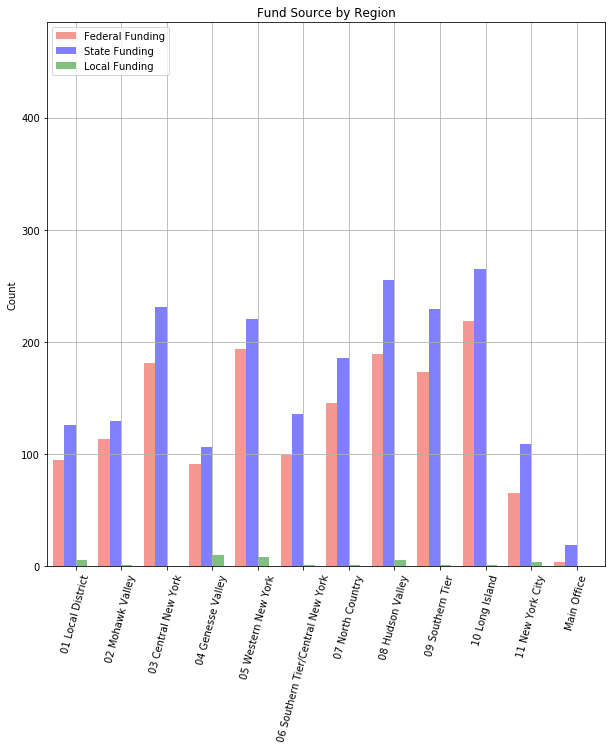

In [286]:
# Setting the positions and width for the bars
pos = list(range(len(df['Federal Funding']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,10))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['Federal Funding'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['Region'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['State Funding'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the second value in first_name
        label=df['Region'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df['Local Funding'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='green', 
        # with label the third value in first_name
        label=df['Region'][2]) 

# Set the y axis label
ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Fund Source by Region')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Region'])
plt.xticks(rotation=75)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['Federal Funding'] + df['State Funding'] + df['Local Funding'])] )

# Adding the legend and showing the plot
plt.legend(['Federal Funding', 'State Funding', 'Local Funding'], loc='upper left')
plt.grid()

plt.savefig('Fund Source by Region.png', bbox_inches="tight")